<a href="https://colab.research.google.com/github/sachin2000k/git_learning/blob/new_branch/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os

In [2]:
import tensorflow as tf
import keras
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test sample: ", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test sample:  (10000, 32, 32, 3) (10000, 1)


In [0]:
No_Classes = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", 
                   "deer","dog", "frog", "horse", "ship", "truck" ]

In [0]:
import numpy as np

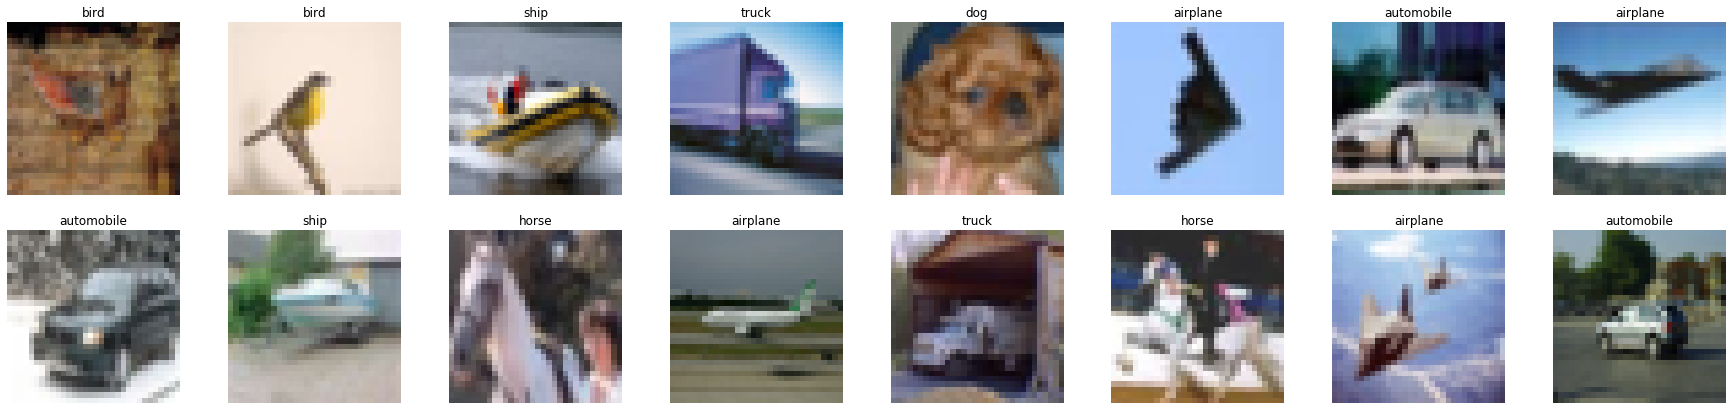

In [8]:
cols = 8
rows = 2
fig = plt.figure(figsize = (4*cols-1, 4*rows-1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0,len(y_train))
    ax = fig.add_subplot(rows,cols,i*rows+j+1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index,0]])
plt.show()

## step 1
normalize inputs

In [0]:
x_train2 = x_train/255 - 0.5
x_test2 = x_test/255 - 0.5

y_train2 = keras.utils.to_categorical(y_train,num_classes=10)
y_test2 = keras.utils.to_categorical(y_test,num_classes=10)

In [10]:
y_train[1:5]

array([[9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train2[1:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#CNN Architecture

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

input  = (none, 32,32,3)
predicts = (none, 10)

Simple feed forward network:
model = Sequential()
model.add(Conv2D(..., input_shape=(32,32,3))
... other layers

model.add(Dense(No_Classes))
model.activation("softmax")


In [0]:
def make_model():

  model = Sequential()
  input_shape = (32,32,3)
  #layer 1
  model.add(Conv2D(kernel_size=(3,3), filters=16, padding = "same", input_shape = (32,32,3)))
  model.add(LeakyReLU(0.1))

  #layer 2
  model.add(Conv2D(kernel_size=(3,3), filters = 32, padding="same"))
  model.add(LeakyReLU(0.1))

  #pooling 1
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #layer 3
  model.add(Conv2D(kernel_size=(3,3), filters = 32, padding = "same"))
  model.add(LeakyReLU(0.1))

  #layer 4
  model.add(Conv2D(kernel_size = (3,3),filters = 64, padding = "same"))
  model.add(LeakyReLU(0.1))

  #pooling 2
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(LeakyReLU(0.25))

  model.add(Flatten())
  model.add(Dense(256))
  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.5))

  model.add(Dense(No_Classes))
  model.add(Activation("softmax"))

  return model

In [14]:
#s = reset_tf_session()
model = make_model()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         


#TRAING THE MODEL

In [15]:
Initial_LR = 5e-3
Batch_Size = 32
Epochs = 10

model = make_model()
model.compile(
    loss= 'categorical_crossentropy',
    optimizer = keras.optimizers.adamax(lr = Initial_LR),
    metrics = ['accuracy']
)

def lr_scheduler(epoch):
  return Initial_LR*0.9**epoch

class LrHistory(keras.callbacks.Callback):
  def on_epoch_begin(self,epoch,log={}):
    print("Learning rate: ", K.get_value(model.optimizer.lr))

In [16]:
model.fit(
    x_train2, y_train2,
    batch_size= Batch_Size,
    epochs=Epochs,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
               LrHistory()
              ],
          validation_data = (x_test2,y_test2),
          shuffle = True,
          verbose = 0,
          
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Learning rate:  0.005
Learning rate:  0.0045
Learning rate:  0.00405
Learning rate:  0.003645
Learning rate:  0.0032805
Learning rate:  0.00295245
Learning rate:  0.002657205
Learning rate:  0.0023914846
Learning rate:  0.002152336
Learning rate:  0.0019371024


In [0]:
model.save_weights('weights.h5')

In [0]:
model.load_weights("weights.h5")

In [0]:
y_pred_test = model.predict_proba(x_test2)

In [20]:
y_pred_test

array([[6.8753380e-08, 5.4137416e-08, 2.4592478e-07, ..., 9.5277759e-09,
        7.7723706e-07, 7.8586396e-08],
       [1.6351783e-06, 9.3301386e-04, 1.5633304e-12, ..., 2.4165270e-15,
        9.9906522e-01, 6.9421645e-08],
       [1.6660001e-02, 2.3691116e-01, 1.1664828e-04, ..., 1.7154014e-05,
        7.1936244e-01, 2.5626495e-02],
       ...,
       [2.6840658e-07, 7.2450739e-08, 4.1200843e-02, ..., 9.8577840e-04,
        1.6719855e-07, 3.2512989e-07],
       [4.4726045e-04, 9.1346830e-01, 2.1060671e-04, ..., 5.6332319e-06,
        3.0501444e-05, 2.2853503e-05],
       [2.0433898e-12, 1.0031716e-13, 1.2653784e-07, ..., 9.9175370e-01,
        5.7486344e-14, 5.5635533e-16]], dtype=float32)

In [0]:
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test,axis=1)

In [22]:
y_pred_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [23]:
y_pred_test_max_probas

array([0.99563473, 0.9990652 , 0.71936244, ..., 0.953019  , 0.9134683 ,
       0.9917537 ], dtype=float32)

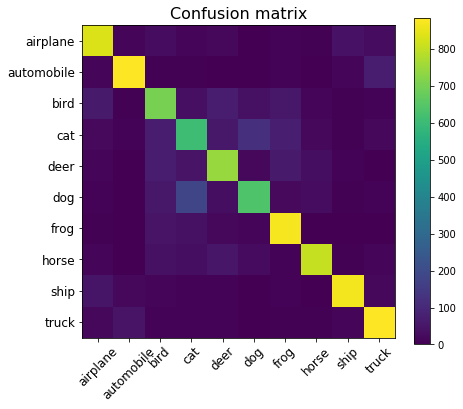

Test accuracy:  0.7842


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7,6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print('Test accuracy: ', accuracy_score(y_test, y_pred_test_classes))

#inspecting what we have done

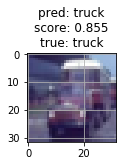

In [25]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2*cols-1,3*rows-1))
for i in range(rows):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_test))
    ax = fig.add_subplot(rows, cols, i*rows +j+1)
    ax.grid('off')
    ax.imshow(x_test[random_index,:])
    pred_label = cifar10_classes[y_pred_test_classes[random_index]]
    pred_proba = y_pred_test_max_probas[random_index]
    true_label = cifar10_classes[y_test[random_index,0]]
    ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(pred_label,pred_proba, true_label))
    plt.show()